In [1]:
import re
import networkx as nx

In [2]:
import pandas as pd
df = pd.read_excel('산업안전보건법.xlsx')
posts = df.get("조내용")
# galexy_post_date = df.get('Post Date')

In [3]:
from konlpy.tag import Mecab
# 형태소 분석기 
tagger = Mecab()
stop_words = list(pd.read_excel("stopwords.xlsx").get("불용어"))
stop_words

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [4]:
# 불용어 제거후 명사만 추출
nouns = []
for post in posts:
    for noun in tagger.nouns(post):
        if noun not in stop_words:
            nouns.append(noun)
nouns[0:10]

['목적', '법', '산업', '안전', '보건', '기준', '확립', '책임', '소재', '산업']

In [5]:
from collections import Counter
num_top_nouns = 20
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))
top_nouns

{'조제': 1533,
 '안전': 1016,
 '경우': 907,
 '보건': 671,
 '고용': 571,
 '자제': 446,
 '물질': 420,
 '호': 398,
 '위반': 382,
 '근로자': 353,
 '해당': 353,
 '사항': 347,
 '작업': 342,
 '기관': 320,
 '노동': 302,
 '부령': 301,
 '장관': 262,
 '노동부': 261,
 '밖': 255,
 '자료': 255}

In [6]:
# 문장별로 나눔
sentences = []
for post in posts:
    sentences.extend(re.split('; |\.|\?|\!', post))
sentences[0:20]

['제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를 명확하게 하여 산업재해를 예방하고 쾌적한 작업환경을 조성함으로써 노무를 제공하는 사람의 안전 및 보건을 유지ㆍ증진함을 목적으로 한다',
 ' <개정 2020',
 '5',
 '26>',
 '제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다',
 ' <개정 2020',
 '5',
 '26>"산업재해"란 노무를 제공하는 사람이 업무에 관계되는 건설물ㆍ설비ㆍ원재료ㆍ가스ㆍ증기ㆍ분진 등에 의하거나 작업 또는 그 밖의 업무로 인하여 사망 또는 부상하거나 질병에 걸리는 것을 말한다',
 '"중대재해"란 산업재해 중 사망 등 재해 정도가 심하거나 다수의 재해자가 발생한 경우로서 고용노동부령으로 정하는 재해를 말한다',
 '"근로자"란 「근로기준법」 제2조제1항제1호에 따른 근로자를 말한다',
 '"사업주"란 근로자를 사용하여 사업을 하는 자를 말한다',
 '"근로자대표"란 근로자의 과반수로 조직된 노동조합이 있는 경우에는 그 노동조합을, 근로자의 과반수로 조직된 노동조합이 없는 경우에는 근로자의 과반수를 대표하는 자를 말한다',
 '"도급"이란 명칭에 관계없이 물건의 제조ㆍ건설ㆍ수리 또는 서비스의 제공, 그 밖의 업무를 타인에게 맡기는 계약을 말한다',
 '"도급인"이란 물건의 제조ㆍ건설ㆍ수리 또는 서비스의 제공, 그 밖의 업무를 도급하는 사업주를 말한다',
 ' 다만, 건설공사발주자는 제외한다',
 '"수급인"이란 도급인으로부터 물건의 제조ㆍ건설ㆍ수리 또는 서비스의 제공, 그 밖의 업무를 도급받은 사업주를 말한다',
 '"관계수급인"이란 도급이 여러 단계에 걸쳐 체결된 경우에 각 단계별로 도급받은 사업주 전부를 말한다',
 '"건설공사발주자"란 건설공사를 도급하는 자로서 건설공사의 시공을 주도하여 총괄ㆍ관리하지 아니하는 자를 말한다',
 ' 다만, 도급받은 건설공사를 다시 도급하는 자는 제외한다',
 '"건설공사"란 다음 각 목의 어느 하나에 해당하는 공사를 말한다']

In [7]:
# 위에서 구한 문장에서 명사만 추출
sentences_nouns = []
for sentence in sentences:
    sentence_nouns = tagger.nouns(sentence)
    sentences_nouns.append(sentence_nouns)
sentences_nouns[0:10]

[['조',
  '목적',
  '법',
  '산업',
  '안전',
  '보건',
  '기준',
  '확립',
  '책임',
  '소재',
  '산업',
  '재해',
  '예방',
  '작업',
  '환경',
  '조성',
  '노무',
  '제공',
  '사람',
  '안전',
  '보건',
  '유지',
  '목적'],
 ['개정'],
 [],
 [],
 ['조', '정의', '법', '사용', '용어', '뜻', '다음'],
 ['개정'],
 [],
 ['산업재',
  '노무',
  '제공',
  '사람',
  '업무',
  '관계',
  '건설물',
  '등',
  '작업',
  '밖',
  '업무',
  '사망',
  '부상',
  '질병',
  '것',
  '말'],
 ['중대',
  '재해',
  '산업',
  '재해',
  '중',
  '사망',
  '등',
  '재해',
  '정도',
  '다수',
  '재해자',
  '발생',
  '경우',
  '고용',
  '노동',
  '부령',
  '재해',
  '말'],
 ['근로자', '란', '근로', '기준', '법', '조제', '항', '호', '근로자', '말']]

In [8]:
# 상위 단어에대해 id 적용
# 상위단어 top_nouns에 대하여 key에 해당하는 단어, value에 해당하는 id를 넣어 
# 딕셔너리 형태로 저장
word2id = {w: i for i, w in enumerate(top_nouns.keys())}
word2id

{'조제': 0,
 '안전': 1,
 '경우': 2,
 '보건': 3,
 '고용': 4,
 '자제': 5,
 '물질': 6,
 '호': 7,
 '위반': 8,
 '근로자': 9,
 '해당': 10,
 '사항': 11,
 '작업': 12,
 '기관': 13,
 '노동': 14,
 '부령': 15,
 '장관': 16,
 '노동부': 17,
 '밖': 18,
 '자료': 19}

In [9]:
id2word = {i: w for i, w in enumerate(top_nouns.keys())}
id2word

{0: '조제',
 1: '안전',
 2: '경우',
 3: '보건',
 4: '고용',
 5: '자제',
 6: '물질',
 7: '호',
 8: '위반',
 9: '근로자',
 10: '해당',
 11: '사항',
 12: '작업',
 13: '기관',
 14: '노동',
 15: '부령',
 16: '장관',
 17: '노동부',
 18: '밖',
 19: '자료'}

# 인접행렬 생성
상위 단어들에 대해서 상위 갯수만큼의 인접행렬을 만들고, 문장내에 상위 단어가 함께 포함된 비중에 따라 가중치를 계산하여 행렬에 표현한다.
인접 행렬을 생성하기 위해서 이전에 생성해준 word2id를 이용한다. 행렬에서 만약 가중치가 0 이상이면 서로 연결되어 있음을 의미한다.

In [10]:
import numpy as np
adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in sentences_nouns:
    for wi, i in word2id.items():
        if wi in sentence:
            for wj, j in word2id.items():
                if i != j and wj in sentence:
                    adjacent_matrix[i][j] += 1
adjacent_matrix

array([[  0, 119, 142,  77, 116,  17,  62, 119,  41,  69,  75,  51,  53,
         51,  73,  72,  80,  80,  66,  38],
       [119,   0, 172, 230, 181,  13,  61, 113,  33,  91, 100, 102,  68,
         89, 126, 125, 102, 102, 109,  50],
       [142, 172,   0, 122, 198,  15,  71, 143,  66, 104, 134,  82,  85,
         78, 131, 130, 127, 126, 103,  38],
       [ 77, 230, 122,   0, 119,  14,  66,  88,  21,  95,  81,  93,  61,
         69,  93,  92,  58,  58,  88,  50],
       [116, 181, 198, 119,   0,  17,  88, 122,  41, 110, 118, 129, 103,
        104, 246, 245, 229, 230, 128,  53],
       [ 17,  13,  15,  14,  17,   0,  12,  17,  12,  14,  16,   9,  15,
          9,  15,  15,  10,  10,   6,  12],
       [ 62,  61,  71,  66,  88,  12,   0,  61,  13,  47,  44,  37,  44,
         27,  66,  65,  54,  54,  38,  47],
       [119, 113, 143,  88, 122,  17,  61,   0,  35,  70, 139,  67,  72,
         45,  80,  79,  79,  79,  81,  33],
       [ 41,  33,  66,  21,  41,  12,  13,  35,   0,  24,  33,  

In [11]:
# 각각에대한 인접행렬의 weight 값을 구함
network = nx.from_numpy_matrix(adjacent_matrix)
list(network.adjacency())

[(0,
  {1: {'weight': 119},
   2: {'weight': 142},
   3: {'weight': 77},
   4: {'weight': 116},
   5: {'weight': 17},
   6: {'weight': 62},
   7: {'weight': 119},
   8: {'weight': 41},
   9: {'weight': 69},
   10: {'weight': 75},
   11: {'weight': 51},
   12: {'weight': 53},
   13: {'weight': 51},
   14: {'weight': 73},
   15: {'weight': 72},
   16: {'weight': 80},
   17: {'weight': 80},
   18: {'weight': 66},
   19: {'weight': 38}}),
 (1,
  {0: {'weight': 119},
   2: {'weight': 172},
   3: {'weight': 230},
   4: {'weight': 181},
   5: {'weight': 13},
   6: {'weight': 61},
   7: {'weight': 113},
   8: {'weight': 33},
   9: {'weight': 91},
   10: {'weight': 100},
   11: {'weight': 102},
   12: {'weight': 68},
   13: {'weight': 89},
   14: {'weight': 126},
   15: {'weight': 125},
   16: {'weight': 102},
   17: {'weight': 102},
   18: {'weight': 109},
   19: {'weight': 50}}),
 (2,
  {0: {'weight': 142},
   1: {'weight': 172},
   3: {'weight': 122},
   4: {'weight': 198},
   5: {'weight': 

In [12]:
import matplotlib as mat
print(mat.matplotlib_fname())

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-package

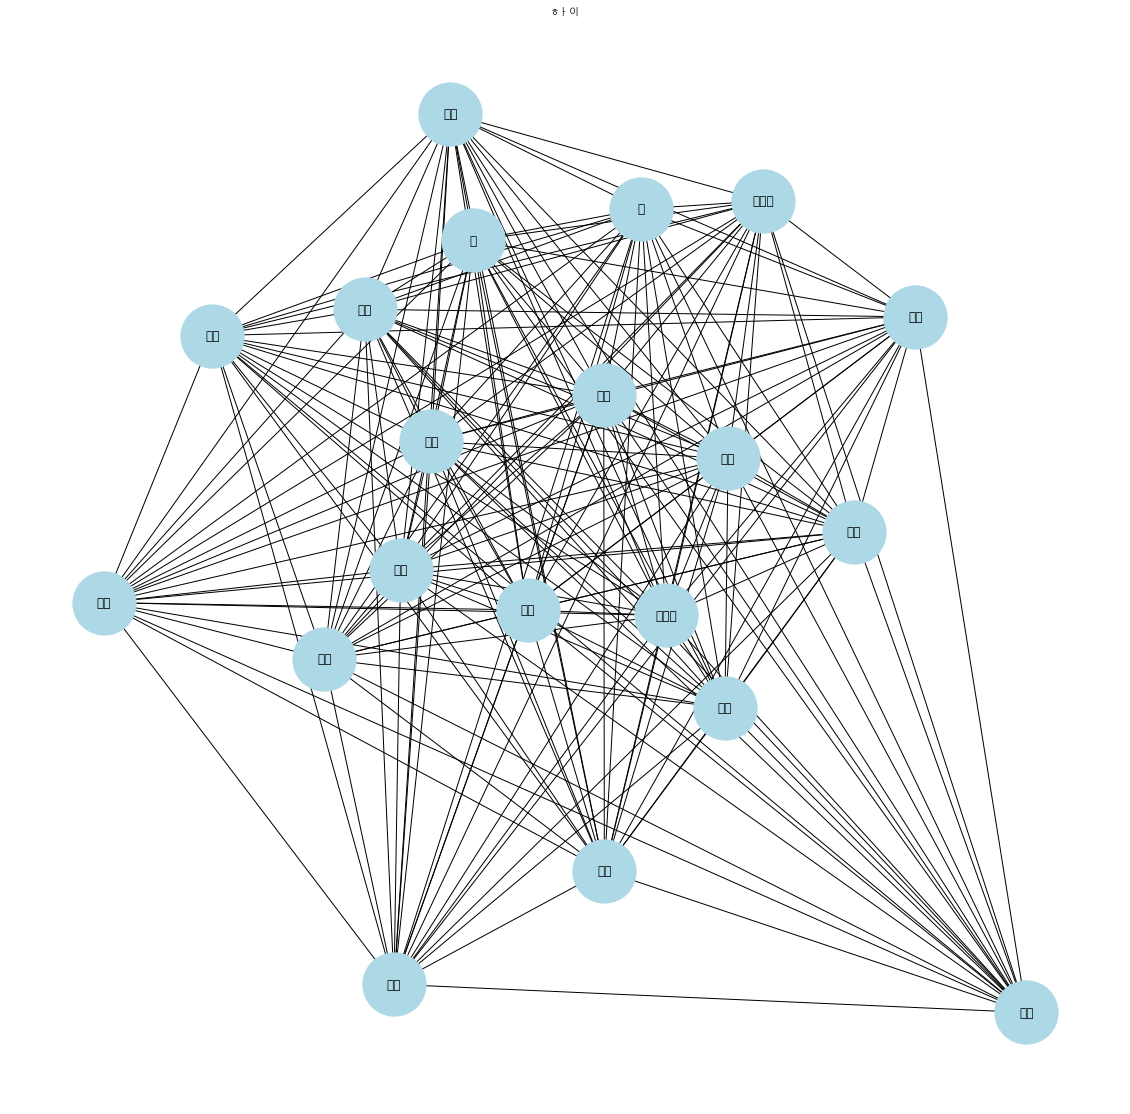

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
import matplotlib

# matplotlib.font_manager._rebuild()

# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams["font.family"] = "NanumGothic"



font_path='./font/NanumGothicCoding.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = "AppleGothic"



# font_path="./font/NanumGothic.ttf"
# font_name = fm.FontProperties(fname=font_path, size=50).get_name()
# plt.rc('font', family=font_name)

# nx.set_fontproperties(font_prop)
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
# ax.axis("off")
ax.set_title("ㅎㅏ이",fontproperties=font_prop)
option = {
    'node_color' : 'lightblue',
    'node_size' : 4000
}
nx.draw(network, labels=id2word, font_family=font_name,ax=ax, **option)

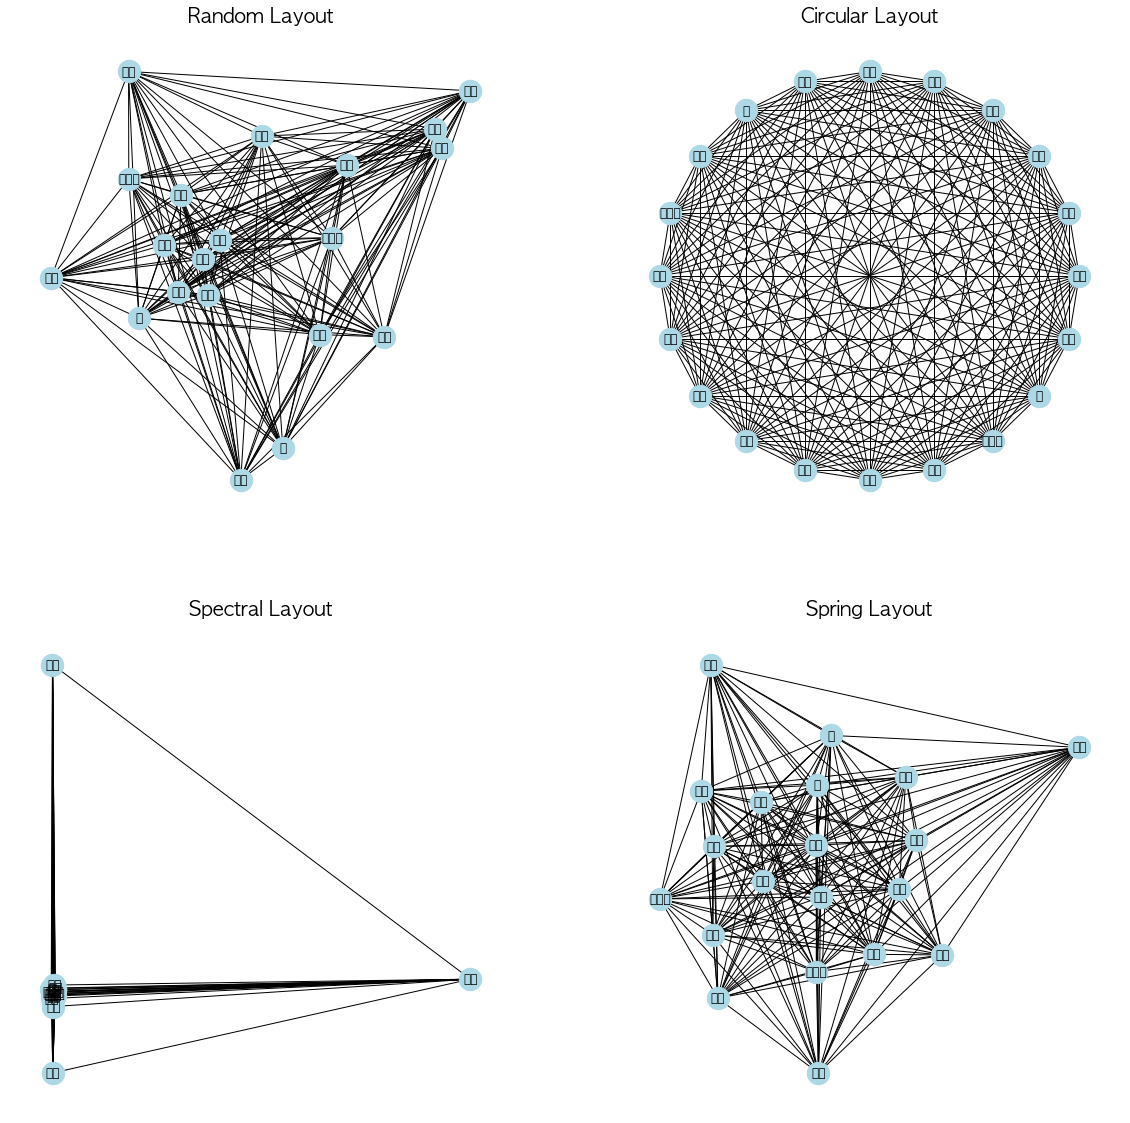

In [14]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 500
}

plt.subplot(221)
plt.title('Random Layout', fontsize=20)
nx.draw_random(network, labels=id2word, font_family=font_name, **option)
plt.subplot(222)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(network, labels=id2word, font_family=font_name, **option)
plt.subplot(223)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(network, labels=id2word, font_family=font_name, **option)
plt.subplot(224)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(network, labels=id2word, font_family=font_name, **option)

In [15]:
#Degree
nx.degree_centrality(network)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0}

In [16]:
#Eigenvector
nx.eigenvector_centrality(network, weight='weight')

{0: 0.21110798894479466,
 1: 0.2969607941604103,
 2: 0.3061188927999583,
 3: 0.2376736129726128,
 4: 0.37788866533469107,
 5: 0.03523123147898196,
 6: 0.14523037729552066,
 7: 0.22743042153699355,
 8: 0.08080480816909937,
 9: 0.1883275560254881,
 10: 0.21110925455799814,
 11: 0.19270576850917587,
 12: 0.16076036026766824,
 13: 0.1544086097256359,
 14: 0.2791474678196817,
 15: 0.2775570514891173,
 16: 0.24708697866457896,
 17: 0.24747974783292773,
 18: 0.20278227572267726,
 19: 0.09180050643554825}

In [17]:
#Closeness
nx.closeness_centrality(network, distance='weight')

{0: 0.03429602888086643,
 1: 0.03941908713692946,
 2: 0.03667953667953668,
 3: 0.03838383838383838,
 4: 0.03429602888086643,
 5: 0.07661290322580645,
 6: 0.042222222222222223,
 7: 0.03429602888086643,
 8: 0.04578313253012048,
 9: 0.03815261044176707,
 10: 0.035580524344569285,
 11: 0.046341463414634146,
 12: 0.038,
 13: 0.046798029556650245,
 14: 0.03682170542635659,
 15: 0.03682170542635659,
 16: 0.04439252336448598,
 17: 0.04439252336448598,
 18: 0.05337078651685393,
 19: 0.04398148148148148}

In [18]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(network)

{0: 0.5263157894736842,
 1: 0.5263157894736842,
 2: 0.5263157894736842,
 3: 0.5263157894736842,
 4: 0.5263157894736842,
 5: 0.5263157894736842,
 6: 0.5263157894736842,
 7: 0.5263157894736842,
 8: 0.5263157894736842,
 9: 0.5263157894736842,
 10: 0.5263157894736842,
 11: 0.5263157894736842,
 12: 0.5263157894736842,
 13: 0.5263157894736842,
 14: 0.5263157894736842,
 15: 0.5263157894736842,
 16: 0.5263157894736842,
 17: 0.5263157894736842,
 18: 0.5263157894736842,
 19: 0.5263157894736842}

In [19]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(network)

{0: 0.05000000000000017,
 1: 0.050000000000000024,
 2: 0.05000000000000011,
 3: 0.05000000000000011,
 4: 0.050000000000000044,
 5: 0.05,
 6: 0.04999999999999998,
 7: 0.050000000000000086,
 8: 0.050000000000000086,
 9: 0.050000000000000024,
 10: 0.04999999999999996,
 11: 0.050000000000000065,
 12: 0.050000000000000024,
 13: 0.050000000000000086,
 14: 0.05000000000000004,
 15: 0.050000000000000044,
 16: 0.05000000000000008,
 17: 0.05,
 18: 0.050000000000000065,
 19: 0.050000000000000024}

In [20]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(network)

{0: 0.6127584843488944,
 1: 0.6127584843488944,
 2: 0.6127584843488942,
 3: 0.6127584843488942,
 4: 0.6127584843488942,
 5: 0.6127584843488942,
 6: 0.6127584843488942,
 7: 0.6127584843488942,
 8: 0.6127584843488942,
 9: 0.6127584843488942,
 10: 0.6127584843488942,
 11: 0.6127584843488942,
 12: 0.6127584843488942,
 13: 0.6127584843488944,
 14: 0.6127584843488942,
 15: 0.6127584843488942,
 16: 0.6127584843488942,
 17: 0.6127584843488942,
 18: 0.6127584843488939,
 19: 0.6127584843488939}